In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch, torchvision
from torchvision import datasets, models, transforms
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import time
from torchsummary import summary
import matplotlib.pyplot as plt
import os
from PIL import Image
from glob import glob
import cv2
import matplotlib.pylab as plt

In [2]:
df = pd.read_excel('Pistachio_16_Features_Dataset.xlsx')

In [3]:
df.head(5)

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,ROUNDNESS,COMPACTNESS,SHAPEFACTOR_1,SHAPEFACTOR_2,SHAPEFACTOR_3,SHAPEFACTOR_4,Class
0,63391,1568.405,390.3396,236.7461,0.7951,284.0984,0.8665,73160,0.6394,1.6488,0.3238,0.7278,0.0062,0.0037,0.5297,0.8734,Kirmizi_Pistachio
1,68358,1942.187,410.8594,234.7525,0.8207,295.0188,0.8765,77991,0.6772,1.7502,0.2277,0.7181,0.0060,0.0034,0.5156,0.9024,Kirmizi_Pistachio
2,73589,1246.538,452.3630,220.5547,0.8731,306.0987,0.9172,80234,0.7127,2.0510,0.5951,0.6767,0.0061,0.0030,0.4579,0.9391,Kirmizi_Pistachio
3,71106,1445.261,429.5291,216.0765,0.8643,300.8903,0.9589,74153,0.7028,1.9879,0.4278,0.7005,0.0060,0.0030,0.4907,0.9755,Kirmizi_Pistachio
4,80087,1251.524,469.3783,220.9344,0.8823,319.3273,0.9657,82929,0.7459,2.1245,0.6425,0.6803,0.0059,0.0028,0.4628,0.9833,Kirmizi_Pistachio


In [4]:
df.shape

(2148, 17)

In [5]:
df["Class"].unique()

array(['Kirmizi_Pistachio', 'Siit_Pistachio'], dtype=object)

In [6]:
kirmizi = df[df['Class'] == 'Kirmizi_Pistachio']
kirmizi.shape

(1232, 17)

In [7]:
siit = df[df['Class'] == 'Siit_Pistachio']
siit.shape

(916, 17)

In [8]:
df.isnull().sum()

AREA             0
PERIMETER        0
MAJOR_AXIS       0
MINOR_AXIS       0
ECCENTRICITY     0
EQDIASQ          0
SOLIDITY         0
CONVEX_AREA      0
EXTENT           0
ASPECT_RATIO     0
ROUNDNESS        0
COMPACTNESS      0
SHAPEFACTOR_1    0
SHAPEFACTOR_2    0
SHAPEFACTOR_3    0
SHAPEFACTOR_4    0
Class            0
dtype: int64

In [9]:
df.describe()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,ROUNDNESS,COMPACTNESS,SHAPEFACTOR_1,SHAPEFACTOR_2,SHAPEFACTOR_3,SHAPEFACTOR_4
count,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000
mean,79950.655493,1425.971751,446.248968,238.311842,0.840219,317.919173,0.940093,85015.839851,0.716067,1.898154,0.569172,0.713077,0.005701,0.003017,0.510461,0.955239
std,13121.737799,375.565503,32.445304,30.310695,0.048759,26.908600,0.050452,13154.919327,0.052532,0.240100,0.212760,0.044547,0.000817,0.000340,0.063942,0.051840
min,29808.000000,858.363000,320.344500,133.509600,0.504900,194.814600,0.588000,37935.000000,0.427200,1.158500,0.062800,0.476000,0.004000,0.002400,0.226600,0.620400
25%,71936.750000,1170.996250,426.508750,217.875825,0.817500,302.642850,0.919850,76467.000000,0.687000,1.736375,0.371250,0.681550,0.005200,0.002800,0.464475,0.944000
50%,79905.500000,1262.785500,448.574750,236.416350,0.849650,318.965300,0.954150,85075.500000,0.726500,1.896250,0.643400,0.710700,0.005600,0.003000,0.505150,0.973100
75%,89030.500000,1607.906250,468.509400,257.760150,0.875200,336.685525,0.976925,93893.500000,0.753600,2.067025,0.744125,0.741650,0.006100,0.003200,0.550075,0.987300
max,124008.000000,2755.049100,541.966100,383.046100,0.946000,397.356100,0.995100,132478.000000,0.820400,3.085800,0.933600,0.877900,0.013100,0.005300,0.770600,0.999000


In [10]:
kirmizi_img = glob('Pistachio_Image_Dataset/Kirmizi_Pistachio/*.jpg')
siirt_img = glob('Pistachio_Image_Dataset/Siirt_Pistachio/*.jpg')

In [11]:
img_mpl = plt.imread(kirmizi_img[6])

<function matplotlib.pyplot.show(close=None, block=None)>

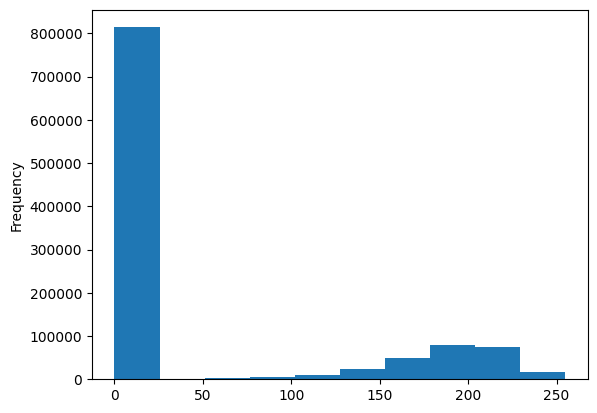

In [12]:
pd.Series(img_mpl.flatten()).plot(kind='hist')
plt.show

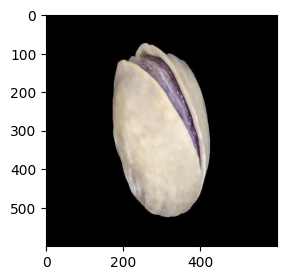

In [13]:
fig, ax = plt.subplots(figsize=(3, 3))
ax.imshow(img_mpl)
plt.show()

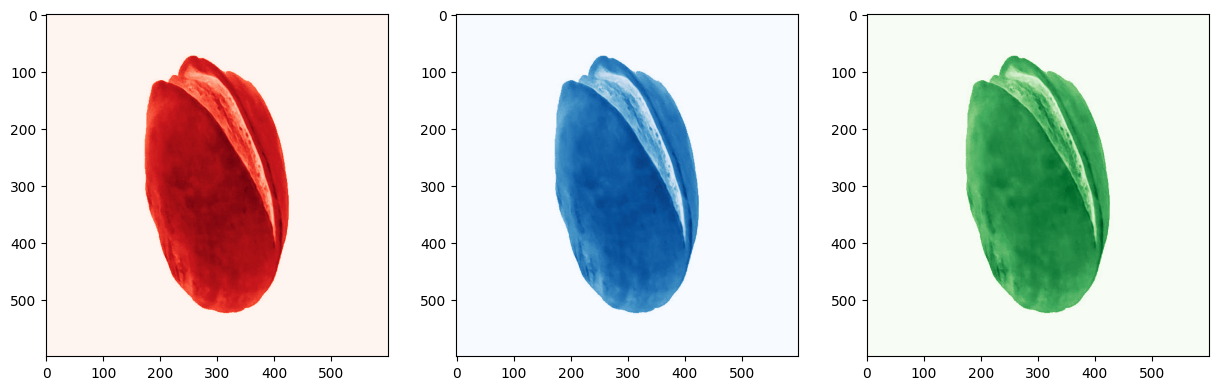

In [14]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(img_mpl[:,:,0], cmap='Reds')
axs[1].imshow(img_mpl[:,:,1], cmap='Blues')
axs[2].imshow(img_mpl[:,:,2], cmap='Greens')
plt.show()

In [1]:
from keras.applications import InceptionV3

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
inc = InceptionV3(input_shape=(224, 224, 3), weights = 'imagenet', include_top=False)

- creating train, valid and test directory :

In [3]:
import random
import shutil
import glob

os.chdir('Pistachio_Image_Dataset')
if os.path.isdir('train/Siirt') is False:
    os.makedirs('train/Kirmizi')
    os.makedirs('valid/Siirt')
    os.makedirs('valid/Kirmizi')
    os.makedirs('test/Siirt')
    os.makedirs('test/Kirmizi')

    for c in random.sample(glob.glob('Siirt_Pistachio/*'), 100):
        shutil.move(c, 'valid/Siirt')
    for c in random.sample(glob.glob('Kirmizi_Pistachio/*'), 100):
        shutil.move(c, 'valid/Kirmizi')
    for c in random.sample(glob.glob('Siirt_Pistachio/*'), 200):
        shutil.move(c, 'test/Siirt')
    for c in random.sample(glob.glob('Kirmizi_Pistachio/*'), 200):
        shutil.move(c, 'test/Kirmizi')
    shutil.move('Siirt_Pistachio', 'train/Siirt')
    shutil.move('Kirmizi_Pistachio', 'train/Kirmizi')

- Preproccessing images :

In [22]:
image_transforms = {
    'train': transforms.Compose([
        transforms.Resize((299, 299)),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'valid': transforms.Compose([
        transforms.Resize((299, 299)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'test': transforms.Compose([
        transforms.Resize((299, 299)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])
}


In [23]:
train_directory = 'Pistachio_Image_Dataset/train'
valid_directory = 'Pistachio_Image_Dataset/valid'
test_directory = 'Pistachio_Image_Dataset/test'

bs = 32

num_classes = 2

data = {
    'train': datasets.ImageFolder(root=train_directory, transform=image_transforms['train']),
    'valid': datasets.ImageFolder(root=valid_directory, transform=image_transforms['valid']),
    'test': datasets.ImageFolder(root=test_directory, transform=image_transforms['test']),
}

# Get a mapping of the indices to the class names, in order to see the output classes of the test images.
idx_to_class = {v: k for k, v in data['train'].class_to_idx.items()}
print(idx_to_class)

train_data_size = len(data['train'])
valid_data_size = len(data['valid'])
test_data_size = len(data['test'])

train_data_loader = DataLoader(data['train'], batch_size=bs, shuffle=True)
valid_data_loader = DataLoader(data['valid'], batch_size=bs, shuffle=True)
test_data_loader = DataLoader(data['test'], batch_size=bs, shuffle=True)

{0: 'Kirmizi', 1: 'Siirt'}


In [19]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [6]:
from torchvision.models import inception_v3
model = inception_v3(pretrained=True)

Downloading: "https://download.pytorch.org/models/inception_v3_google-0cc3c7bd.pth" to C:\Users\Rina/.cache\torch\checkpoints\inception_v3_google-0cc3c7bd.pth
100%|██████████| 104M/104M [07:24<00:00, 245kB/s]  


In [10]:
model

Inception3(
  (Conv2d_1a_3x3): BasicConv2d(
    (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2a_3x3): BasicConv2d(
    (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2b_3x3): BasicConv2d(
    (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (Conv2d_3b_1x1): BasicConv2d(
    (conv): Conv2d(64, 80, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(80, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_4a_3x3): BasicConv2d(
    (conv): Conv2d(80, 192, kernel_size=(3, 3), stri

In [11]:
for param in model.parameters():
    param.requires_grad = False

In [13]:
in_features = model.fc.in_features
model.fc = nn.Linear(in_features, num_classes)
model.softmax = nn.Softmax(dim=1)

In [14]:
model

Inception3(
  (Conv2d_1a_3x3): BasicConv2d(
    (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2a_3x3): BasicConv2d(
    (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2b_3x3): BasicConv2d(
    (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (Conv2d_3b_1x1): BasicConv2d(
    (conv): Conv2d(64, 80, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(80, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_4a_3x3): BasicConv2d(
    (conv): Conv2d(80, 192, kernel_size=(3, 3), stri

In [17]:
summary(model, input_size=(3, 299, 299))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 149, 149]             864
       BatchNorm2d-2         [-1, 32, 149, 149]              64
       BasicConv2d-3         [-1, 32, 149, 149]               0
            Conv2d-4         [-1, 32, 147, 147]           9,216
       BatchNorm2d-5         [-1, 32, 147, 147]              64
       BasicConv2d-6         [-1, 32, 147, 147]               0
            Conv2d-7         [-1, 64, 147, 147]          18,432
       BatchNorm2d-8         [-1, 64, 147, 147]             128
       BasicConv2d-9         [-1, 64, 147, 147]               0
        MaxPool2d-10           [-1, 64, 73, 73]               0
           Conv2d-11           [-1, 80, 73, 73]           5,120
      BatchNorm2d-12           [-1, 80, 73, 73]             160
      BasicConv2d-13           [-1, 80, 73, 73]               0
           Conv2d-14          [-1, 192,

In [18]:
loss = nn.BCELoss()
optimizer = optim.Adam(model.parameters())
optimizer

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.001
    maximize: False
    weight_decay: 0
)

In [20]:
def train_and_validate(model, loss_criterion, optimizer, epochs=25):
    start = time.time()
    history = []
    best_acc = 0.0
    for epoch in range(epochs):
        epoch_start = time.time()
        print("Epoch: {}/{}".format(epoch+1, epochs))
        model.train()

        train_loss = 0.0
        train_acc = 0.0
        
        valid_loss = 0.0
        valid_acc = 0.0
        
        for i, (inputs, labels) in enumerate(train_data_loader):

            inputs = inputs.to(device)
            labels = labels.to(device)
            
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = loss_criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            train_loss += loss.item() * inputs.size(0)
            ret, predictions = torch.max(outputs.data, 1)
            correct_counts = predictions.eq(labels.data.view_as(predictions))
            acc = torch.mean(correct_counts.type(torch.FloatTensor))
            train_acc += acc.item() * inputs.size(0)
            
            #print("Batch number: {:03d}, Training: Loss: {:.4f}, Accuracy: {:.4f}".format(i, loss.item(), acc.item()))

            
        # Validation - No gradient tracking needed
        with torch.no_grad():
            model.eval()
            for j, (inputs, labels) in enumerate(valid_data_loader):
                inputs = inputs.to(device)
                labels = labels.to(device)
                outputs = model(inputs)
                loss = loss_criterion(outputs, labels)
                valid_loss += loss.item() * inputs.size(0)
                ret, predictions = torch.max(outputs.data, 1)
                correct_counts = predictions.eq(labels.data.view_as(predictions))
                acc = torch.mean(correct_counts.type(torch.FloatTensor))
                valid_acc += acc.item() * inputs.size(0)

                #print("Validation Batch number: {:03d}, Validation: Loss: {:.4f}, Accuracy: {:.4f}".format(j, loss.item(), acc.item()))
            
        avg_train_loss = train_loss/train_data_size 
        avg_train_acc = train_acc/train_data_size

        avg_valid_loss = valid_loss/valid_data_size 
        avg_valid_acc = valid_acc/valid_data_size

        history.append([avg_train_loss, avg_valid_loss, avg_train_acc, avg_valid_acc])
                
        epoch_end = time.time()
    
        print("Epoch : {:03d}, Training: Loss: {:.4f}, Accuracy: {:.4f}%, \n\t\tValidation : Loss : {:.4f}, Accuracy: {:.4f}%, Time: {:.4f}s".format(epoch+1, avg_train_loss, avg_train_acc*100, avg_valid_loss, avg_valid_acc*100, epoch_end-epoch_start))
            
    return model, history

In [24]:
trained_model, history = train_and_validate(model, loss, optimizer, 5)

torch.save(history, 'Pistachio_Image_Dataset'+'_history.pt')

Epoch: 1/5


RuntimeError: Calculated padded input size per channel: (3 x 3). Kernel size: (5 x 5). Kernel size can't be greater than actual input size